In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Load the dataset
data_set = pd.read_csv("SVR.csv")

# Extract the features (X) and target variable (y)
X = data_set.iloc[:, 1:-1].values
y = data_set.iloc[:, -1].values
print(X)
print(y)

# Reshape the target variable (only if needed)
y = y.reshape(len(y), 1)
print(y)

# Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]
[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]
[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]
[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]
[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


In [7]:
regressor = SVR()
regressor.fit(X, y)

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [8]:
y_predict = sc_y.inverse_transform(regressor.predict(sc_X.transform(X)).reshape(-1,1))
print(y_predict)

[[403211.17423103]
 [364935.1568332 ]
 [327150.1384411 ]
 [290599.68599254]
 [256020.53643989]
 [224107.21315719]
 [195476.96539831]
 [170637.5793631 ]
 [149960.56064574]
 [133661.90795866]
 [114237.03847466]
 [110728.09230573]]


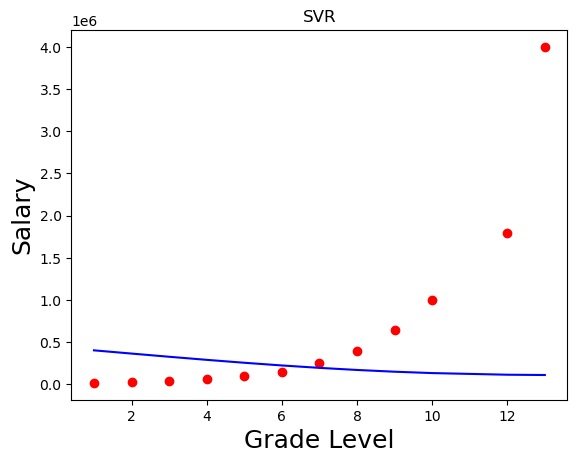

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), y_predict, color = 'blue')
plt.title('SVR')
plt.xlabel('Grade Level', fontsize = 18)
plt.ylabel('Salary', fontsize = 18)
plt.show()